## Logistic Regression

This notebook contains the implementation of the Logistic Regression classifier.

<b>Importing libraries</b>

In [1]:
import warnings
import os
import sys

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))

sys.path.append(parent_dir)

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from src.main.models.logistic import Logistic
from src.main.utilities.utils import get_dataset, split_train_val_test
from src.main.pipeline.functions import stop_words_removal, stemming, select_features, count_vectorizer, tfidf_transformer, clean_text, remove_contractions
from sklearn.model_selection import train_test_split
import time

import warnings
warnings.filterwarnings("ignore")

<b>Define model and pipeline, apply pipeline to dataset</b>

In [3]:
# define model and pipeline
inputs, targets = get_dataset()
logistic = Logistic(verbose=False, multi_class="multinomial", n_jobs=-1, max_iter=1000)
logistic.pipeline = [remove_contractions, clean_text, stop_words_removal, stemming, count_vectorizer]

# import dataset and apply pipeline
inputs = logistic.run_pipeline(inputs, save=True)

In [4]:
inputs = select_features(inputs, targets, k=10000)
inputs = tfidf_transformer(inputs)
x_train, x_val, x_test, y_train, y_val, y_test = split_train_val_test(inputs, targets, validation_size=0.2, test_size=0.1)

<b>Model grid search</b>

In [5]:
start = time.time()
search = logistic.grid_search(x_train, y_train, n_iter=50)
end = time.time()
print("Elapsed:", end - start)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/f.decastelli/mensa_martiri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/f.decastelli/mensa_martiri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/f.decastelli/mensa_martiri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/f.decastelli/mensa_martiri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/f.decastelli/mensa_martiri/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/f.decaste

Elapsed: 146.09510779380798


<b>Model Evaluation</b>

In [8]:
search.best_score_

0.7973484364900074

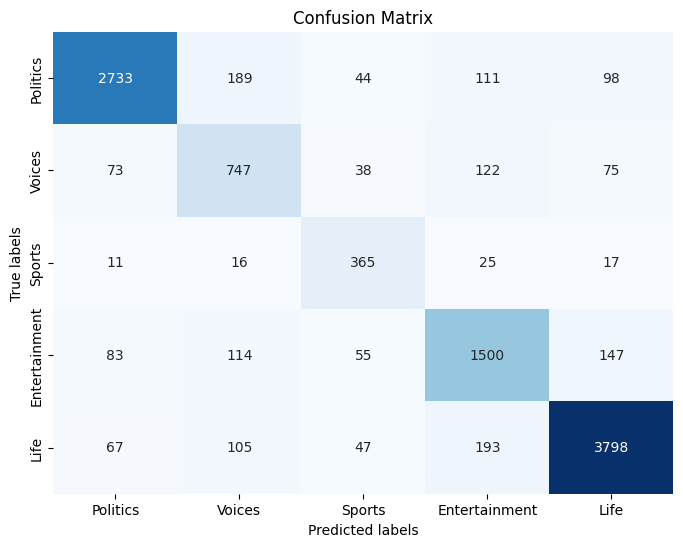

In [9]:
logistic.save_results(x_test, y_test)